In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from base_network import NNetwork 

In [3]:
def generate_data(n_samples=1000):
    """Generate a simple dataset for binary classification."""
    X = np.random.randn(2, n_samples)
    Y = ((X[0] + X[1]) > 0).astype(int).reshape(1, -1)
    return X, Y

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[0].min() - 1, X[0].max() + 1
    y_min, y_max = X[1].min() - 1, X[1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[0], X[1], c=y.reshape(-1), alpha=0.8)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

In [4]:
X, Y = generate_data(n_samples=1000)

X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T
X_train.shape, Y_train.shape

((2, 800), (1, 800))

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.T).T
X_test = scaler.transform(X_test.T).T

In [6]:
model = NNetwork([2, 5, 3, 1], activation="relu", optimizer="adam", learning_rate=0.01)
losses = model.train(X_train, Y_train, epochs=1000, batch_size=32)

Epoch 0, Loss: 0.6901818454517595
Epoch 100, Loss: 0.004733143360340513
Epoch 200, Loss: 0.0012942971576163334


/Users/timii/Desktop/Developer/Implementation-of-Neural-Net-in-Numpy/base_network.py:34: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))
/Users/timii/Desktop/Developer/Implementation-of-Neural-Net-in-Numpy/base_network.py:68: RuntimeWarning: invalid value encountered in divide
  dA = - (np.divide(Y, self.A_cache[f'A{self.num_layers-1}']) -
/Users/timii/Desktop/Developer/Implementation-of-Neural-Net-in-Numpy/base_network.py:43: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-Z))
/Users/timii/Desktop/Developer/Implementation-of-Neural-Net-in-Numpy/base_network.py:128: RuntimeWarning: divide by zero encountered in log
  batch_loss = -np.mean(Y_batch * np.log(A) + (1 - Y_batch) * np.log(1 - A))
/Users/timii/Desktop/Developer/Implementation-of-Neural-Net-in-Numpy/base_network.py:128: RuntimeWarning: invalid value encountered in multiply
  batch_loss = -np.mean(Y_batch * np.log(A) + (1 - Y_batch) * np.log(1 - A))


Epoch 300, Loss: nan
Epoch 400, Loss: nan
Epoch 500, Loss: nan
Epoch 600, Loss: nan
Epoch 700, Loss: nan
Epoch 800, Loss: nan
Epoch 900, Loss: nan


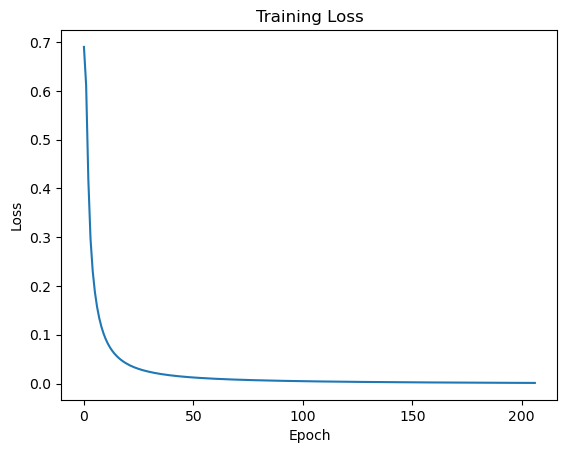

In [7]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

Test Accuracy: 0.4950
Confusion Matrix:
[[ 99   0]
 [101   0]]


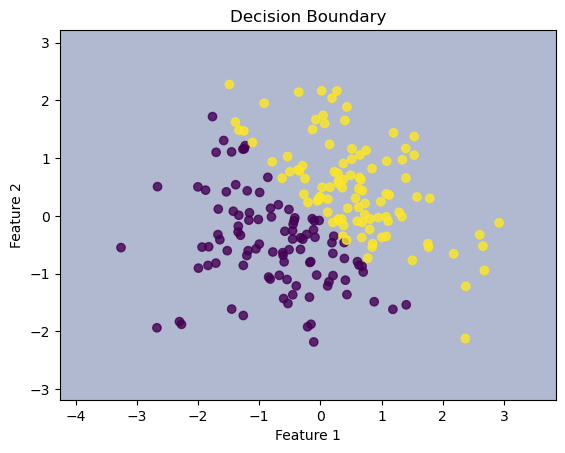

In [8]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test.T, Y_pred.T)
conf_matrix = confusion_matrix(Y_test.T, Y_pred.T)

print(f"Test Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

plot_decision_boundary(X_test, Y_test, model)